In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")

In [2]:
fb=pd.merge(fba,fbb,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

以臺北市第七選舉區立委嘎啦嘎拉為例，依照月份來統計數值資料的變化

In [3]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [4]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [5]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團'], dtype=object)

In [6]:
fei = fb[fb.page_name == "費鴻泰（阿力克司）"]
# 把時間格式轉換
fei['new_date'] = pd.to_datetime(fei['created_time_taipei']).dt.date
fei['post_hour'] = pd.to_datetime(fei['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
fei['month_year'] = pd.to_datetime(fei['new_date']).dt.to_period('M')
fei.head(1)

<ipython-input-6-a12287b24571>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fei['new_date'] = pd.to_datetime(fei['created_time_taipei']).dt.date
<ipython-input-6-a12287b24571>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fei['post_hour'] = pd.to_datetime(fei['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-6-a12287b24571>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
35005,893657620668012_2235795896454171,893657620668012,費鴻泰（阿力克司）,Politician,「費鴻泰＋徐巧芯」，本週日初登場！\n\n市場服務全新升級版\n\n號外、號外！年輕、活力的...,費鴻泰（阿力克司） is with Chiao Hsin Hsu and 費鴻泰.,photo,https://www.facebook.com/893657620668012/posts...,2019-01-03T13:21:22+0000,2019-01-03T21:21:22,...,0,0,0,0,0,43,37,2019-01-03,21,2019-01


In [7]:
#發文時間分佈
post_time = fei[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,13
1,1,5
2,2,4
3,3,2
4,6,1
5,7,4
6,8,16
7,9,27
8,10,25
9,11,20


In [8]:
fei[fei.created_time_taipei == max(fei.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
35376,893657620668012_2925355730831514,893657620668012,費鴻泰（阿力克司）,Politician,一路走來，有您的支持，費鴻泰點滴在心頭\n\n依照選罷法的規定，今晚十點後就不能再進行選舉活...,NaN,photo,https://www.facebook.com/893657620668012/posts...,2020-01-10T13:00:56+0000,2020-01-10T21:00:56,...,0,0,0,0,0,31,0,2020-01-10,21,2020-01


In [9]:
fei[fei.created_time_taipei == min(fei.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
35007,893657620668012_2232008413499586,893657620668012,費鴻泰（阿力克司）,Politician,中華民國萬歲！\n\n元旦升旗 向國父致敬,費鴻泰（阿力克司） is with 費鴻泰.,photo,https://www.facebook.com/893657620668012/posts...,2019-01-01T01:45:55+0000,2019-01-01T09:45:55,...,0,0,0,0,0,29,9,2019-01-01,9,2019-01


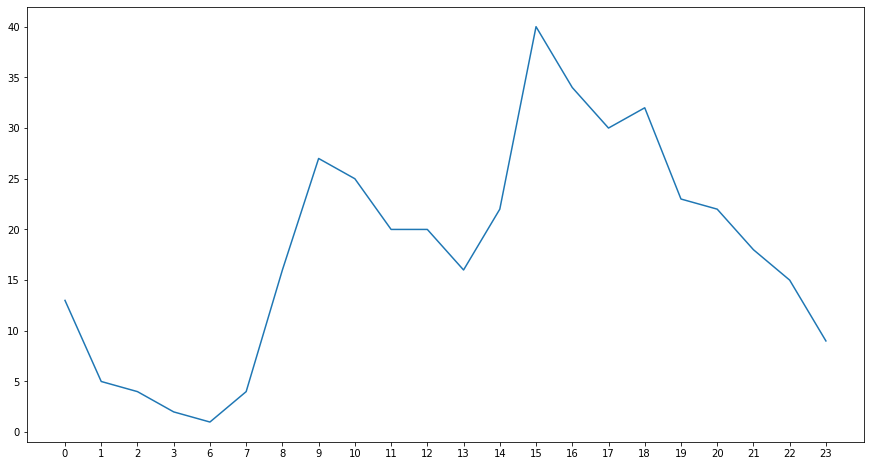

In [10]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [11]:
#整年貼文數量分佈
whole_year = fei[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,19
1,2019-02,20
2,2019-03,44
3,2019-04,52
4,2019-05,34
5,2019-06,22
6,2019-07,28
7,2019-08,24
8,2019-09,25
9,2019-10,22


In [12]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,13.000000
mean,30.615385
std,10.782227
min,19.000000
25%,22.000000
50%,26.000000
75%,37.000000
max,52.000000


In [13]:
results = fei.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,16979494792692228,13504,0,0,0,0,0,414,211,276
2019-02,17873152413360240,22278,0,0,0,0,0,863,322,279
2019-03,39320935309392544,49795,0,0,0,0,0,3203,971,654
2019-04,46470196274736672,53087,0,0,0,0,0,3263,1433,720
2019-05,30384359102712408,22886,0,0,0,0,0,1750,403,494
2019-06,19660467654696264,15851,0,0,0,0,0,905,463,321
2019-07,25022413378704336,20852,0,0,0,0,0,1402,525,375
2019-08,21447782896032288,19926,0,0,0,0,0,1149,484,381
2019-09,22341440516700300,22792,0,0,0,0,0,3068,428,383


In [14]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,16979494792692228,13504,0,0,0,0,0,414,211,276
1,2019-02,17873152413360240,22278,0,0,0,0,0,863,322,279
2,2019-03,39320935309392544,49795,0,0,0,0,0,3203,971,654
3,2019-04,46470196274736672,53087,0,0,0,0,0,3263,1433,720
4,2019-05,30384359102712408,22886,0,0,0,0,0,1750,403,494
5,2019-06,19660467654696264,15851,0,0,0,0,0,905,463,321
6,2019-07,25022413378704336,20852,0,0,0,0,0,1402,525,375
7,2019-08,21447782896032288,19926,0,0,0,0,0,1149,484,381
8,2019-09,22341440516700300,22792,0,0,0,0,0,3068,428,383
9,2019-10,19660467654696264,14674,0,0,0,0,0,1318,481,301


In [15]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

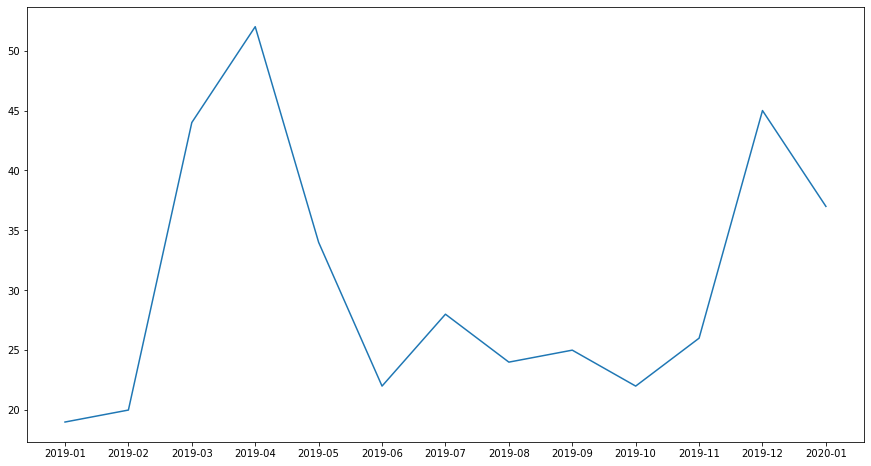

In [16]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [17]:
# 每個月的按讚、評論、分享總數 分佈
results = fei.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,16979494792692228,13504,0,0,0,0,0,414,211,276
1,2019-02,17873152413360240,22278,0,0,0,0,0,863,322,279
2,2019-03,39320935309392544,49795,0,0,0,0,0,3203,971,654
3,2019-04,46470196274736672,53087,0,0,0,0,0,3263,1433,720
4,2019-05,30384359102712408,22886,0,0,0,0,0,1750,403,494
5,2019-06,19660467654696264,15851,0,0,0,0,0,905,463,321
6,2019-07,25022413378704336,20852,0,0,0,0,0,1402,525,375
7,2019-08,21447782896032288,19926,0,0,0,0,0,1149,484,381
8,2019-09,22341440516700300,22792,0,0,0,0,0,3068,428,383
9,2019-10,19660467654696264,14674,0,0,0,0,0,1318,481,301


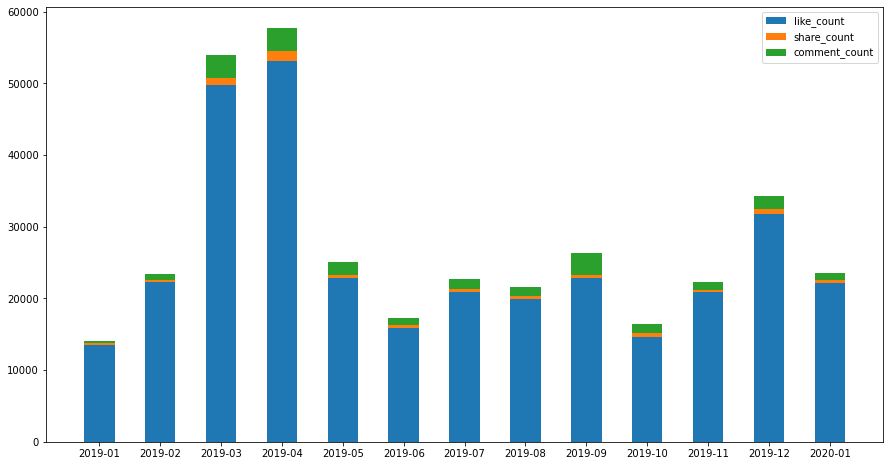

In [18]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [19]:
#找出評論數量的統計值
fei['comment_count'].describe()

count    398.000000
mean      53.228643
std       68.652672
min        6.000000
25%       24.000000
50%       38.500000
75%       61.750000
max      808.000000
Name: comment_count, dtype: float64

In [20]:
#找出按讚數量的統計值
fei['like_count'].describe()

count     398.000000
mean      830.321608
std       526.306365
min        82.000000
25%       437.250000
50%       739.000000
75%      1092.750000
max      3663.000000
Name: like_count, dtype: float64

In [22]:
# 很明顯3、4月按讚、分享、評論數衝高，因此找出3月的資料
high = fei[fei.month_year == "2019-03"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-03-01,893657620668012,1064,0,0,0,0,0,53,34,19
1,2019-03-02,893657620668012,456,0,0,0,0,0,207,32,9
2,2019-03-04,893657620668012,733,0,0,0,0,0,319,18,19
3,2019-03-05,893657620668012,1093,0,0,0,0,0,70,8,18
4,2019-03-06,893657620668012,940,0,0,0,0,0,47,47,19
5,2019-03-08,2680972862004036,3778,0,0,0,0,0,133,68,42
6,2019-03-10,893657620668012,1599,0,0,0,0,0,102,44,16
7,2019-03-11,893657620668012,903,0,0,0,0,0,87,18,13
8,2019-03-12,893657620668012,1214,0,0,0,0,0,223,43,18
9,2019-03-15,1787315241336024,1095,0,0,0,0,0,76,19,36


No handles with labels found to put in legend.


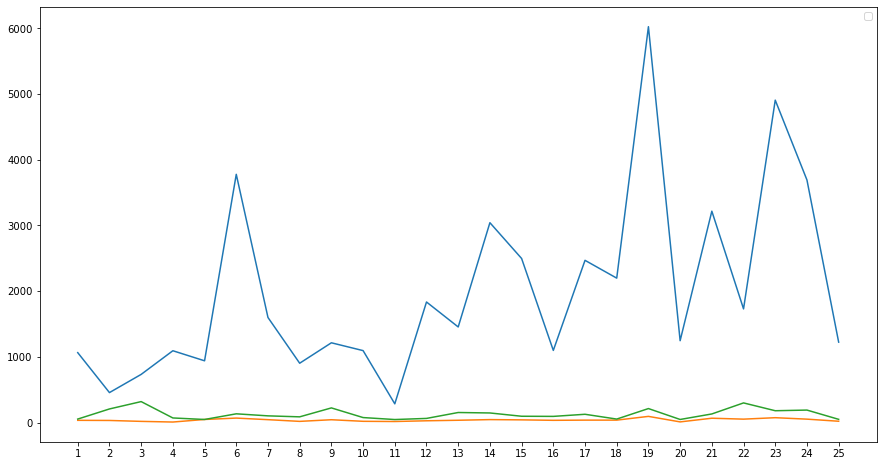

In [23]:
#畫圖 看整個三月按讚、分享、評論的流量
labels = [str(i) for i in range(1,26)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [24]:
#3/24 號很明顯按讚較高  因此找出這天的文章
fei['new_date']=fei['new_date'].map(str) # turn 'new_date' into str
Mar_24 = fei[fei['new_date'] == "2019-03-24"]
Mar_24[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-24-d8323c8b43aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fei['new_date']=fei['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
35074,費鴻泰鄭重呼籲：「支持費鴻泰 、 提名韓國瑜」 這幾天，我到選區各地方去拜票，所見到的鄉...,114,3144
35075,「民進黨政府抹紅韓國瑜，只會讓他人氣越來越走紅！」 韓市長赴港行程中，面會了中聯辦主任王志...,83,2708
35076,❤️費鴻泰為民爭取權益 - 捷運篇❤️ 1、率先在議會要求捷運票價調降，讓台北市民通勤費用...,16,173


In [25]:
# 很明顯3、4月按讚、分享、評論數衝高，因此找出4月的資料
high = fei[fei.month_year == "2019-04"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-04-01,3574630482672048,4888,0,0,0,0,0,286,83,64
1,2019-04-02,1787315241336024,2858,0,0,0,0,0,113,55,26
2,2019-04-03,893657620668012,228,0,0,0,0,0,34,9,17
3,2019-04-04,1787315241336024,2367,0,0,0,0,0,121,40,25
4,2019-04-05,1787315241336024,2735,0,0,0,0,0,254,45,18
5,2019-04-06,1787315241336024,2517,0,0,0,0,0,168,59,18
6,2019-04-07,893657620668012,1351,0,0,0,0,0,91,26,8
7,2019-04-08,1787315241336024,1936,0,0,0,0,0,77,96,20
8,2019-04-09,2680972862004036,1987,0,0,0,0,0,119,66,38
9,2019-04-10,2680972862004036,3545,0,0,0,0,0,133,84,52


No handles with labels found to put in legend.


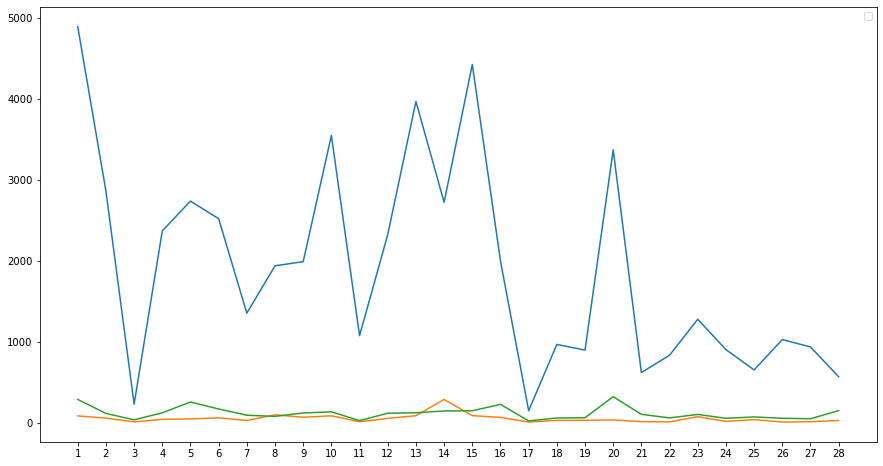

In [26]:
#畫圖 看整個四月按讚、分享、評論的流量
labels = [str(i) for i in range(1,29)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [27]:
#4/1 號很明顯按讚較高  因此找出這天的文章
fei['new_date']=fei['new_date'].map(str) # turn 'new_date' into str
Apr_01 = fei[fei['new_date'] == "2019-04-01"]
Apr_01[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-27-187ccc0a2925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fei['new_date']=fei['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
35095,今天下午國民黨立法委員黨內初選號次抽籤，費鴻泰抽到 1 號，在此向鄉親報告，拜託您在4月14...,86,1628
35096,「陳水扁在殘害司法，如果司法是可以這樣被踐踏，沒有人會相信司法」 費鴻泰今天與黃昭順、許毓...,90,1732
35097,民進黨只顧意識形態，要讓人民餓肚子 韓國瑜市長到港澳及中國地區，與中國簽訂許多訂單。出國期...,70,1259
35098,【直播】 告發法務部、台中監獄，「扁」回中監！,40,269


In [28]:
#按讚次數最多的貼文 
mostlike_10 = fei.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
35085,拜會韓市長、一起拼經濟 競選前，曾泰葆和韓國瑜市長候選人一同擘畫財經政策。 今天，曾銘宗...,3663,2019-03
35074,費鴻泰鄭重呼籲：「支持費鴻泰 、 提名韓國瑜」 這幾天，我到選區各地方去拜票，所見到的鄉...,3144,2019-03
35211,恭喜韓國瑜市長出線，代表國民黨參選2020總統大選。敬請本黨的黨內同志放下初選紛擾，大家團結...,3041,2019-07
35075,「民進黨政府抹紅韓國瑜，只會讓他人氣越來越走紅！」 韓市長赴港行程中，面會了中聯辦主任王志...,2708,2019-03
35124,感謝各位好友對費鴻泰的支持與信任，就在今天下午4時，信義與南松山完成立委初選黨員投票作業，費...,2563,2019-04
35033,❤️不一樣的情人節❤️ 「ㄧ人當選、兩人服務」 費鴻泰、王怡心祝福您,2514,2019-02
35111,陳致中不自量力，回家叫你爸爸來 陳水扁一家為何會這麼有錢？自然就是因為貪污...,2496,2019-04
35083,費鴻泰、賴士葆、曾銘宗、許毓仁 於昨天（29日）南下高雄，共同拜會韓國瑜市長。費鴻泰表示，此...,2304,2019-03
35247,民進黨執政不准任何人質疑總統，否則恐成被告 自從民進黨執政，尤其去年地方選舉...,2276,2019-08
35060,費鴻泰 參選立委黨內初選「自我說明」 費鴻泰擁有美國肯塔基大學統計學博士，曾任...,2272,2019-03


In [29]:
#最多讚數前10的文章的 種類 video / photo?
mostlike_10 = fei.sort_values(by = ['like_count'],ascending=False).head(10)
mostlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,10,10,10,10,10,8,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [30]:
# 比較、查看他政見
promise = politics[politics.姓名 == "費鴻泰"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['7    1.推動青年創業的優惠融資，以及輔導青年就業等措施', '2.建立合理的薪資與工時制度', '3.建...']

1. 觸及高內容總統帶小雞（占比高達一半）、批DPP及扁（3則）、個人選舉（3則）
2. 觸及高缺乏地方建設等牛肉（與其他立委叫相異之處）